### Prerequisites

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import itertools
import pandas as pd
import seaborn as sns
from markovModel import*
import networkx as nx
from scipy import stats

### Mira et al. data

In [9]:
#==============================================================================#
# The landscapes reported by Mira et. al.
#==============================================================================#
MIRA_AMP = FitnessLandscape([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821], "Ampicillin")
MIRA_AM  = FitnessLandscape([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047], "Amoxicillin")
MIRA_CEC = FitnessLandscape([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516], "Cefaclor")
MIRA_CTX = FitnessLandscape([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412], "Cefotaxime")
MIRA_ZOX = FitnessLandscape([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591], "Ceftizoxime")
MIRA_CXM = FitnessLandscape([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923], "Cefuroxime")
MIRA_CRO = FitnessLandscape([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227], "Ceftriaxone")
MIRA_AMC = FitnessLandscape([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728], "Amoxicillin + Clav")
MIRA_CAZ = FitnessLandscape([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563], "Ceftazidime")
MIRA_CTT = FitnessLandscape([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543], "Cefotetan")
MIRA_SAM = FitnessLandscape([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453], "Ampicillin +Sulbactam")
MIRA_CPR = FitnessLandscape([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288], "Cefprozil")
MIRA_CPD = FitnessLandscape([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268], "Cefpodoxime")
MIRA_TZP = FitnessLandscape([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171], "Piperacillin + Tazobactam")
MIRA_FEP = FitnessLandscape([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203], "Cefepime")



landscapes = [MIRA_AMP, MIRA_AM, MIRA_CEC, MIRA_CTX, MIRA_ZOX, MIRA_CXM, MIRA_CRO, MIRA_AMC, MIRA_CAZ, MIRA_CTT, MIRA_SAM, MIRA_CPR, MIRA_CPD, MIRA_TZP, MIRA_FEP]
names = ['AMP','AM','CEC','CTX','ZOX','CXM','CRO','AMC','CAZ', 'CTT','SAM','CPR','CPD','TZP','FEP']

In [10]:
abxDicts = [{'Name':'Ampicillin','Class':'Penicillin','Abbreviation':'AMP'},
            {'Name':'Amoxicillin','Class':'Penicillin','Abbreviation':'AM'},
           {'Name':'Cefaclor','Class':'Cephalosporin','Abbreviation':'CEC'},
            {'Name':'Cefotaxime','Class':'Cephalosporin','Abbreviation':'CTX'},
            {'Name':'Ceftizoxime','Class':'Cephalosporin','Abbreviation':'ZOX'},
           {'Name':'Cefuroxime','Class':'Cephalosporin','Abbreviation':'CXM'},
            {'Name':'Ceftriaxone','Class':'Cephalosporin','Abbreviation':'CRO'},
           {'Name':'Amoxicillin + Clav.','Class':'Penicillin + Inhib.','Abbreviation':'AMC'},
           {'Name':'Ceftazidime','Class':'Cephalosporin','Abbreviation':'CAZ'},
           {'Name':'Cefotetan','Class':'Cephalosporin','Abbreviation':'CTT'},
           {'Name':'Ampicillin +Sulbactam','Class':'Penicillin + Inhib.','Abbreviation':'SAM'},
           {'Name':'Cefprozil','Class':'Cephalosporin','Abbreviation':'CPR'},
           {'Name':'Cefpodoxime','Class':'Cephalosporin','Abbreviation':'CPD'},
           {'Name':'Piperacillin + Tazobactam','Class':'Penicillin + Inhib.','Abbreviation':'TZP'},
           {'Name':'Cefepime','Class':'Cephalosporin','Abbreviation':'FEP'}]
classColors = {'Cephalosporin':'Navy', 'Penicillin + Inhib.':'Orange','Penicillin':'Purple'}

### Calculating edge flips

In [16]:
l1 = FitnessLandscape([.5,.4,.7,.6])
l2 = FitnessLandscape([.5,.4,.7,.8])
p1 = buildTransitionMatrix(l1)
p2 = buildTransitionMatrix(l2)
edgeFlips(p1,p2)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -2.],
       [ 0.,  0.,  0.,  0.]])

Text(0.6, 0.6, '$\\textbf{E} =  [U^{\\lceil\\textbf{A}\\rceil} - L^{\\lceil\\textbf{A}\\rceil T} - ( U^{\\lceil\\textbf{B}\\rceil} - L^{\\lceil\\textbf{B}\\rceil T})]/2 = \\begin{bmatrix} 0 & 0 & 0 & 0 \\\\ 0 & 0 & 0  & 0 \\\\ 0 & 0 & 0 & -1 \\\\ 0 & 0 & 0 & 0  \\end{bmatrix}$')

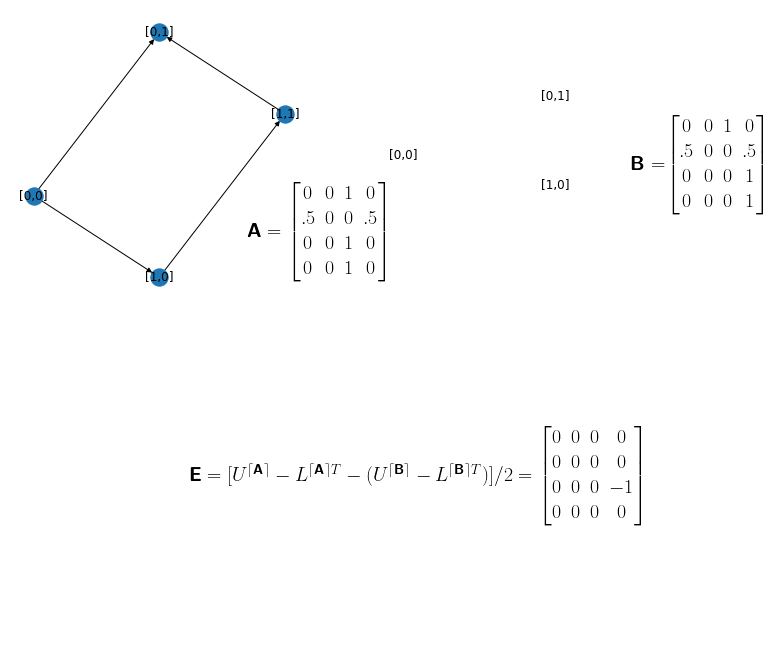

In [12]:
fig,axs=plt.subplots(2,2,figsize=(12,12))


g1 = nx.DiGraph()
g1.add_nodes_from([1,2,3,4])
g1.add_edge(1,2)
g1.add_edge(1,3)
g1.add_edge(3,4)
g1.add_edge(4,2)

pos1= {(1):np.array([0,.5]),(2):np.array([.5,.7]),(3):np.array([.5,.4]),(4):np.array([1,.6])}
labe= {(1):'[0,0]',(2):'[0,1]',(3):'[1,0]',(4):'[1,1]'}
nx.draw(g1,with_labels=True,pos=pos1,ax=axs[0,0],labels=labe)

g2 = nx.DiGraph()
g1.add_nodes_from([1,2,3,4])
g1.add_edge(1,2)
g1.add_edge(1,3)
g1.add_edge(2,4)
g1.add_edge(3,4)
pos2= {(1):np.array([.1,.5]),(2):np.array([.6,.7]),(3):np.array([.6,.4]),(4):np.array([1.1,.8])}
G2 = nx.hypercube_graph(2)
nx.draw(g2,labels=labe,pos=pos2,ax=axs[0,1])


mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'



axs[0,0].text(0.85, .45, r'$\textbf{A} = \begin{bmatrix} 0 & 0 & 1 & 0 \\ .5 & 0 & 0  & .5 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0  \end{bmatrix}$')
axs[0,1].text(0.85, .45, r'\textbf{B} =$\begin{bmatrix} 0 & 0 & 1 & 0 \\ .5 & 0 & 0  & .5 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 1  \end{bmatrix}$')

axs[1,0].axis(False)

axs[1,1].axis(False)
axs[1,0].text(0.6, .6, r'$\textbf{E} =  [U^{\lceil\textbf{A}\rceil} - L^{\lceil\textbf{A}\rceil T} - ( U^{\lceil\textbf{B}\rceil} - L^{\lceil\textbf{B}\rceil T})]/2 = \begin{bmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0  & 0 \\ 0 & 0 & 0 & -1 \\ 0 & 0 & 0 & 0  \end{bmatrix}$')

In [25]:
flipMatrix = np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        p1=buildTransitionMatrix(l1)
        p2 = buildTransitionMatrix(l2)
        flipMatrix[i,j] = np.sum(np.abs(edgeFlips(p1,p2)/2))

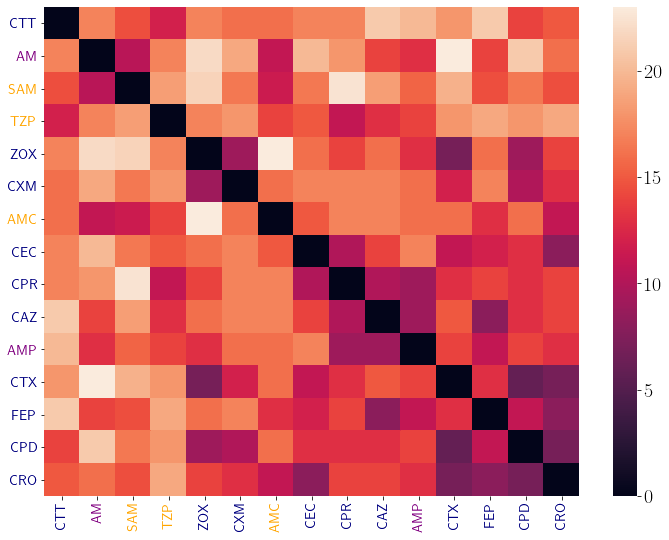

In [26]:
fig,ax=plt.subplots(figsize=(12,9))
df = pd.DataFrame(data=flipMatrix,columns = names,index=names)
rank =np.argsort(np.sum(flipMatrix,axis=1));
g = sns.heatmap(flipMatrix[rank[::-1]][:,rank[::-1]],ax=ax);
ax.set_xticklabels(np.array(names)[rank[::-1]]);
ax.set_yticklabels(np.array(names)[rank[::-1]]);


for l in g.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(90)


/Users/nikhilkrishnan/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/nikhilkrishnan/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


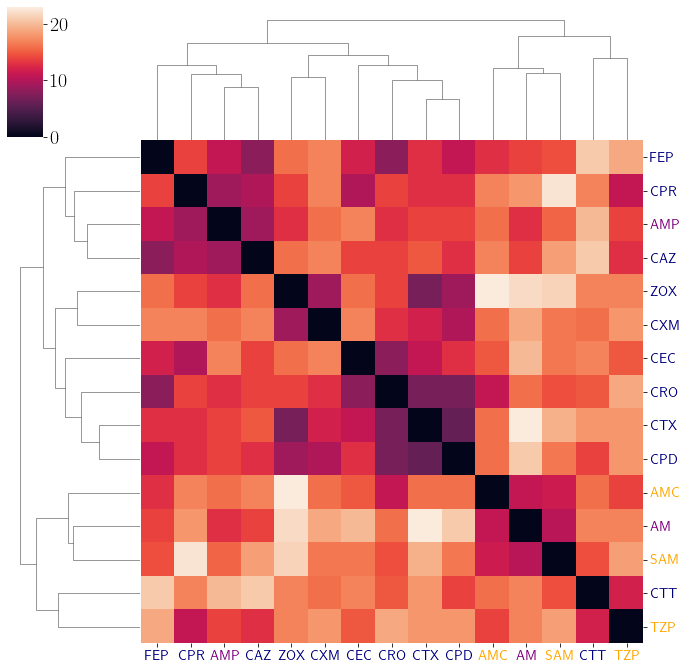

In [27]:
df = pd.DataFrame(data=flipMatrix,columns = names,index=names)
g = sns.clustermap(df)

for l in g.ax_heatmap.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.ax_heatmap.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)



#ax.set_xticklabels(names,fontsize=15,rotation=90)
#ax.set_yticklabels(names,fontsize=15,rotation = 360)
#ax.collections[0].colorbar.set_label("Edge flips",fontsize=16)

## Nichol et al. results

In [28]:
L_AMP = limitMatrix(buildTransitionMatrix(MIRA_AMP))
L_AM  = limitMatrix(buildTransitionMatrix(MIRA_AM))
L_CEC = limitMatrix(buildTransitionMatrix(MIRA_CEC))
L_CTX = limitMatrix(buildTransitionMatrix(MIRA_CTX))
L_ZOX = limitMatrix(buildTransitionMatrix(MIRA_ZOX))
L_CXM = limitMatrix(buildTransitionMatrix(MIRA_CXM))
L_CRO = limitMatrix(buildTransitionMatrix(MIRA_CRO))
L_AMC = limitMatrix(buildTransitionMatrix(MIRA_AMC))
L_CAZ = limitMatrix(buildTransitionMatrix(MIRA_CAZ))
L_CTT = limitMatrix(buildTransitionMatrix(MIRA_CTT))
L_SAM = limitMatrix(buildTransitionMatrix(MIRA_SAM))
L_CPR = limitMatrix(buildTransitionMatrix(MIRA_CPR))
L_CPD = limitMatrix(buildTransitionMatrix(MIRA_CPD))
L_TZP = limitMatrix(buildTransitionMatrix(MIRA_TZP))
L_FEP = limitMatrix(buildTransitionMatrix(MIRA_FEP))

limit_matrices = [L_AMP, L_AM, L_CEC, L_CTX, L_ZOX, L_CXM, L_CRO, L_AMC, L_CAZ, L_CTT, L_SAM, L_CPR, L_CPD, L_TZP, L_FEP]

#==============================================================================#
# The initial population vector. Each genotype is considered equally likely to 
# constitute the initial genotype.
#==============================================================================#
init_pop = np.array([1./2**4 for i in range(16)])

#==============================================================================#
# Functions which generate the results of table 1 in the manuscript
#==============================================================================#

# Determines for each drug the probability of ending at the highest fitness peak
# genotype when starting from the initial distribution init_pop.
def probHighestPeak(init_pop):
	highest_pgs_probs = []
	for t in range(len(limit_matrices)):
		dist = np.array(init_pop * limit_matrices[t])[0]
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		highest_pgs_probs.append(dist[global_peak_index])
		print(landscapes[t].name+":", highest_pgs_probs[t])

	return highest_pgs_probs

# Determines for each drug the single steering drug which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestSingle(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_steerer = -1
		for s in range(len(limit_matrices)):
			dist = np.array(init_pop * limit_matrices[s] * limit_matrices[t])[0]
			if dist[global_peak_index] < best_prob:
				best_prob = dist[global_peak_index]
				best_steerer = s
		best_steerers.append((landscapes[s], best_prob))

		print(landscapes[t].name+":", landscapes[best_steerer].name, best_prob)
	return best_steerers

# Determines for each drug the ordered pair of steering drugs which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestDouble(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_s1 = -1
		best_s2 = -1
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[t])[0]
				if dist[global_peak_index] < best_prob:
					best_prob = dist[global_peak_index]
					best_s1 = s1
					best_s2 = s2

		print(landscapes[t].name+":", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+", ", best_prob)
		best_steerers.append((landscapes[best_s2], landscapes[best_s2], best_prob))
	return best_steerers

# Determines for each drug the ordered triple of steering drugs which minimizes the probability
# that evolution proceeds to the highest fitness peak.
def highPeakBestTriple(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		global_peak_index = convertGenotypeToInt(landscapes[t].getGlobalPeak())
		best_prob = 1.0
		best_s1 = -1
		best_s2 = -1
		best_s3 = -1
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				for s3 in range(len(limit_matrices)):
					dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[s3] * limit_matrices[t])[0]
					if dist[global_peak_index] < best_prob:
						best_prob = dist[global_peak_index]
						best_s1 = s1
						best_s2 = s2
						best_s3 = s3


		print(landscapes[t].name+":", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+" ---> "+landscapes[best_s3].name+", ", best_prob)
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], landscapes[best_s3], best_prob))

	return best_steerers

#==============================================================================#
# Functions which generate the results of table 2 in the manuscript
#==============================================================================#

# Determines for each drug the probability of ending at the lowest fitness peak
# genotype when starting from the initial distribution init_pop.
def probLowestPeak(init_pop):
	lowest_pgs_probs = []
	for t in range(len(limit_matrices)):
		dist = np.array(init_pop * limit_matrices[t])[0]
		lpg = landscapes[t].getLowestFitnessPeak()
		lowest_pgs_probs.append(dist[convertGenotypeToInt(lpg)])		
		print(landscapes[t].name+":", lowest_pgs_probs[t])

	return lowest_pgs_probs

# Determines for each drug the single steering drug which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestSingle(init_pop):
	best_steerers = [] 
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_steerer = -1
		best_prob = 0.0

		#For each possible steerer
		for s in range(len(limit_matrices)):
			dist = np.array(init_pop * limit_matrices[s] * limit_matrices[t])[0]
			if dist[lowest_peak_index] > best_prob:
				best_prob = dist[lowest_peak_index]
				best_steerer = s
		best_steerers.append((landscapes[best_steerer], best_prob))

		print(landscapes[t].name+":", best_steerers[t][0].name, best_steerers[t][1])

	return best_steerers

# Determines for each drug the ordered pair of steering drugs which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestDouble(init_pop):
	best_steerers = [] 
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_s1 = -1
		best_s2 = -1
		best_prob = 0.0
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[t])[0]
				if dist[lowest_peak_index] > best_prob:
					best_prob = dist[lowest_peak_index]
					best_s1 = s1
					best_s2 = s2
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], best_prob))
		print(landscapes[t].name+":  ", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+", ", best_prob)

	return best_steerers

# Determines for each drug the ordered triple of steering drugs which maximizes the probability
# that evolution proceeds to the lowest fitness peak.
def lowestPeakBestTriple(init_pop):
	best_steerers = []
	for t in range(len(limit_matrices)):
		lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

		best_s1 = -1
		best_s2 = -1
		best_s3 = -1
		best_prob = 0.0
		for s1 in range(len(limit_matrices)):
			for s2 in range(len(limit_matrices)):
				for s3 in range(len(limit_matrices)):
					dist = np.array(init_pop * limit_matrices[s1] * limit_matrices[s2] * limit_matrices[s3] * limit_matrices[t])[0]
					if dist[lowest_peak_index] > best_prob:
						best_prob = dist[lowest_peak_index]
						best_s1 = s1
						best_s2 = s2
						best_s3 = s3
		best_steerers.append((landscapes[best_s1], landscapes[best_s2], landscapes[best_s3], best_prob))
		print(landscapes[t].name+":  ", landscapes[best_s1].name+" ---> "+landscapes[best_s2].name+" ---> "+landscapes[best_s3].name+", ", best_prob)

	return best_steerers

#==============================================================================#
# Functions which generate the results of table 3 in the manuscript
#==============================================================================#

# Determines the percentage of single steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def singleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for s in range(len(limit_matrices)): 
				steered_pop = (init_pop * limit_matrices[s] * limit_matrices[t]).tolist()[0]
				straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

				#Floating point arithematic is nasty, check for what is essential equality
				if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
					same+=1
				elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
					worse+=1
				elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
					better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)



	print("Overall, better:", str(overall_better)+" ("+str(pc_ov_better)+"%)", ", worse:", str(overall_worse)+" ("+str(pc_ov_worse)+"%)")
	return steering_stats


# Determines the percentage of ordered pairs of steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def doubleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for k1 in range(len(limit_matrices)):
				for k2 in range(len(limit_matrices)): 
					steered_pop = (init_pop * limit_matrices[k1] * limit_matrices[k2] * limit_matrices[t]).tolist()[0]
					straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

				
					#Floating point arithematic is nasty, check for what is essential equality
					if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
						same+=1
					elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
						worse+=1
					elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
						better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)



	print("Overall, better:", str(overall_better)+" ("+str(pc_ov_better)+"%)", ", worse:", str(overall_worse)+" ("+str(pc_ov_worse)+"%)")
	return steering_stats


# Determines the percentage of ordered triples of steering drugs that decrease and increase the
# probability of evolution to the highest peak of the landscape.
def tripleSteererPercentages(init_pop, allowSAM = True):

	steering_stats = []

	overall_better = 0
	overall_worse = 0
	overall_same = 0

	for t in range(len(limit_matrices)):
		if t!=10 or allowSAM:

			better = 0
			worse = 0
			same = 0

			peak_genotype = landscapes[t].getGlobalPeak()
			peak_genotype_index = convertGenotypeToInt(peak_genotype)
			peak_fitness = landscapes[t].getFitness(peak_genotype)

			for k1 in range(len(limit_matrices)):
				for k2 in range(len(limit_matrices)): 
					for k3 in range(len(limit_matrices)):

						steered_pop = (init_pop * limit_matrices[k1] * limit_matrices[k2] * limit_matrices[k3] * limit_matrices[t]).tolist()[0]
						straight_pop = (init_pop * limit_matrices[t]).tolist()[0]

						#Floating point arithematic is nasty, check for what is essential equality
						if np.abs(steered_pop[peak_genotype_index] - straight_pop[peak_genotype_index]) < 10**-15:
							same+=1
						elif steered_pop[peak_genotype_index] > straight_pop[peak_genotype_index]:
							worse+=1
						elif steered_pop[peak_genotype_index] < straight_pop[peak_genotype_index]:
							better+=1

			steering_stats.append((better,worse,same))


			pc_better = 100*float(better) / (better+worse+same)
			pc_worse  = 100*float(worse) / (better+worse+same)
			print(landscapes[t].name+", better:", str(better)+" ("+str(pc_better)+"%)", ", worse:", str(worse)+" ("+str(pc_worse)+"%)")

			overall_better+=better
			overall_worse+=worse
			overall_same+=same
			pc_ov_better = 100*float(overall_better) / (overall_better+overall_worse+overall_same)
			pc_ov_worse = 100*float(overall_worse) / (overall_better+overall_worse+overall_same)



	print("Overall, better:", str(overall_better)+" ("+str(pc_ov_better)+"%)", ", worse:", str(overall_worse)+" ("+str(pc_ov_worse)+"%)")
	return steering_stats

#==============================================================================#
# Generates Results
#==============================================================================#

print("Table 1 results: \n")
probHighestPeak(init_pop)

highPeakBestSingle(init_pop)

highPeakBestDouble(init_pop)

highPeakBestTriple(init_pop)

print("Table 2 results: \n")
probLowestPeak(init_pop)

lowestPeakBestSingle(init_pop)
 
lowestPeakBestDouble(init_pop)

lowestPeakBestTriple(init_pop)

print("Table 3 results: \n")
singleSteererPercentages(init_pop)

doubleSteererPercentages(init_pop)

tripleSteererPercentages(init_pop)

Table 1 results: 

Ampicillin: 0.6226851851851852
Amoxicillin: 0.7472993827160493
Cefaclor: 0.1875
Cefotaxime: 0.16666666666666666
Ceftizoxime: 0.861111111111111
Cefuroxime: 0.5636574074074074
Ceftriaxone: 0.27575231481481477
Amoxicillin + Clav: 0.665943287037037
Ceftazidime: 0.3923611111111111
Cefotetan: 0.17592592592592593
Ampicillin +Sulbactam: 1.0
Cefprozil: 0.2465277777777778
Cefpodoxime: 0.8086419753086419
Piperacillin + Tazobactam: 0.8009259259259259
Cefepime: 0.4756944444444444
Ampicillin: Cefprozil 0.2465277777777778
Amoxicillin: Cefotaxime 0.6161479766803841
Cefaclor: Ampicillin +Sulbactam 0.0
Cefotaxime: Cefprozil 0.041087962962962965
Ceftizoxime: Amoxicillin 0.8131751543209876
Cefuroxime: Amoxicillin + Clav 0.3329716435185185
Ceftriaxone: Cefaclor 0.203125
Amoxicillin + Clav: Cefuroxime 0.388166848851166
Ceftazidime: Piperacillin + Tazobactam 0.0815650720164609
Cefotetan: Amoxicillin + Clav 0.0
Ampicillin +Sulbactam: Ceftriaxone 0.9999999999999999
Cefprozil: Ampicillin 0.0


Ampicillin, better: 1373 (40.681481481481484%) , worse: 1998 (59.2%)
Amoxicillin, better: 787 (23.31851851851852%) , worse: 2587 (76.65185185185184%)
Cefaclor, better: 2087 (61.837037037037035%) , worse: 1264 (37.45185185185185%)
Cefotaxime, better: 989 (29.303703703703704%) , worse: 2335 (69.18518518518519%)
Ceftizoxime, better: 444 (13.155555555555555%) , worse: 2930 (86.81481481481481%)
Cefuroxime, better: 1486 (44.02962962962963%) , worse: 1885 (55.851851851851855%)
Ceftriaxone, better: 810 (24.0%) , worse: 2564 (75.97037037037038%)
Amoxicillin + Clav, better: 1428 (42.31111111111111%) , worse: 1943 (57.57037037037037%)
Ceftazidime, better: 1218 (36.08888888888889%) , worse: 2153 (63.79259259259259%)
Cefotetan, better: 843 (24.977777777777778%) , worse: 2531 (74.99259259259259%)
Ampicillin +Sulbactam, better: 0 (0.0%) , worse: 0 (0.0%)
Cefprozil, better: 1703 (50.45925925925926%) , worse: 1668 (49.422222222222224%)
Cefpodoxime, better: 282 (8.355555555555556%) , worse: 3077 (91.170

[(1373, 1998, 4),
 (787, 2587, 1),
 (2087, 1264, 24),
 (989, 2335, 51),
 (444, 2930, 1),
 (1486, 1885, 4),
 (810, 2564, 1),
 (1428, 1943, 4),
 (1218, 2153, 4),
 (843, 2531, 1),
 (0, 0, 3375),
 (1703, 1668, 4),
 (282, 3077, 16),
 (81, 3293, 1),
 (402, 2972, 1)]

## Single Steering Drugs and Edge Flips

In [29]:
best_steerers = [] 
peakPercentMat =np.zeros((len(limit_matrices),len(limit_matrices)))
for i, t in enumerate(range(len(limit_matrices))):
    lowest_peak_index = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())

    best_steerer = -1
    best_prob = 0.0
    
    #For each possible steerer
    for j,s in enumerate(range(len(limit_matrices))):
        lowest_peak_index1 = convertGenotypeToInt(landscapes[t].getLowestFitnessPeak())
        dist1 = np.array(init_pop * limit_matrices[s] * limit_matrices[t])[0]
        lowest_peak_index2 = convertGenotypeToInt(landscapes[s].getLowestFitnessPeak())
        dist2 = np.array(init_pop * limit_matrices[t] * limit_matrices[s])[0]
        peakPercentMat[i,j] = max(dist1[lowest_peak_index1],dist2[lowest_peak_index2])
        

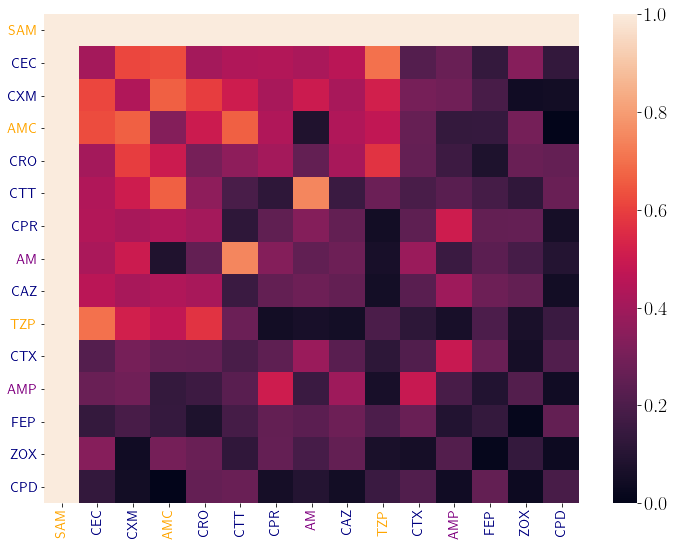

In [30]:
fig,ax=plt.subplots(figsize=(12,9))
df = pd.DataFrame(data=peakPercentMat,columns = names,index=names)
rank =np.argsort(np.mean(peakPercentMat,axis=0));
g = sns.heatmap(peakPercentMat[rank[::-1]][:,rank[::-1]],ax=ax);
ax.set_xticklabels(np.array(names)[rank[::-1]]);
ax.set_yticklabels(np.array(names)[rank[::-1]]);


for l in g.yaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(0)
    
for l in g.xaxis.get_majorticklabels():
    for dct in abxDicts:
        if l.get_text() == dct['Abbreviation']:
            l.set_color(classColors[dct['Class']])
    l.set_size(14)
    l.set_rotation(90)



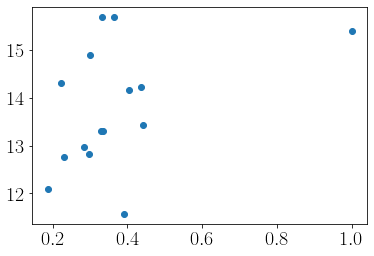

In [31]:
plt.scatter(np.mean(peakPercentMat,axis=0), np.mean(flipMatrix,axis=0))

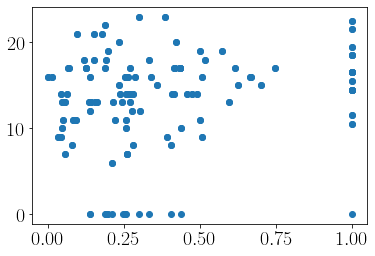

In [32]:
plt.scatter(peakPercentMat.flatten(), flipMatrix.flatten())

## Spearman correlation and Edge Flips

In [33]:
spearMatrix=np.zeros((len(landscapes),len(landscapes)))
for i,l1 in enumerate(landscapes):
    for j,l2 in enumerate(landscapes):
        a1=np.array(l1.landscape)
        a1=(a1 - a1.mean(axis=0)) / a1.std(axis=0)
        a2 =np.array(l2.landscape)
        a2=(a2 - a2.mean(axis=0)) / a2.std(axis=0)
        
    
        spearMatrix[i,j] = stats.spearmanr(a1, a2)[0]



In [34]:
np.std(a1)

1.0

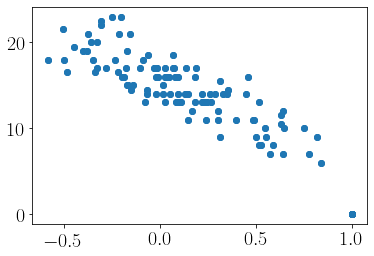

In [35]:
plt.scatter(spearMatrix,flipMatrix)

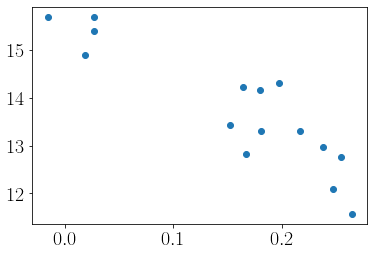

In [36]:
plt.scatter(np.mean(spearMatrix,axis=0),np.mean(flipMatrix,axis=0))

## edgeflips over seascape 

In [37]:
##Adapted from Irem et al, 2020
# This script reproduces the drug response curves in Ogbunugafor et. al, 2016
# to confirm that wer're doing everything right.

# Note that the equation expects log10 of drug concentration and IC 50
# Also note that we're working with molar concentrations while Ogbunugafor et. al
# used micromolar

# This is the value of c used by Ogbunugafor et. al, 2016 (obtained via personal communication)
c = -.6824968
# IC50 values are from supplemental table 1 of Ogbunugafor et. al, 2016/supplemental 
# data table 3 of Brown et al, 2010 (https://academic.oup.com/mbe/article/27/12/2682/1072079)
# (the same data are in both tables). They are log10.
logic50s = [-6.286,-5.812,-4.239,1,-6.046,-5.774,-3.732,-3.55,-5.724,-5.491,-4.015,-4.6,-5.773,-5.624,-3.587,-3.3]
# These are the untransformed drugless growth values from supplemental 
# data table 3 of Brown et al, 2010. Normalized versions of these values were used
# by Ogbunugafor et. al, 2016 
g_druglesses = [0.000969794, 0.000884475, 0.000851618, 0, 0.000950368, 0.000953728, 0.000969172, 0.000845918, 0.000776222, 0.000821543, 0.000906315, 0.000693783, 0.000883164, 0.000889632, 0.001005913, 0.000867504]


xs = []
ys = []
for _ in g_druglesses:
    ys.append([])

for i in np.logspace(-9, 5, num=100000):
    xs.append(i)
    for genotype in range(len(logic50s)):
        ys[genotype].append((g_druglesses[genotype]/(1+np.exp((logic50s[genotype] - np.log10(i))/c)))/0.000693783)
   


In [389]:
arr = np.abs(np.diff(np.argsort(ys,axis=0)))

arr[arr!=0] = 1

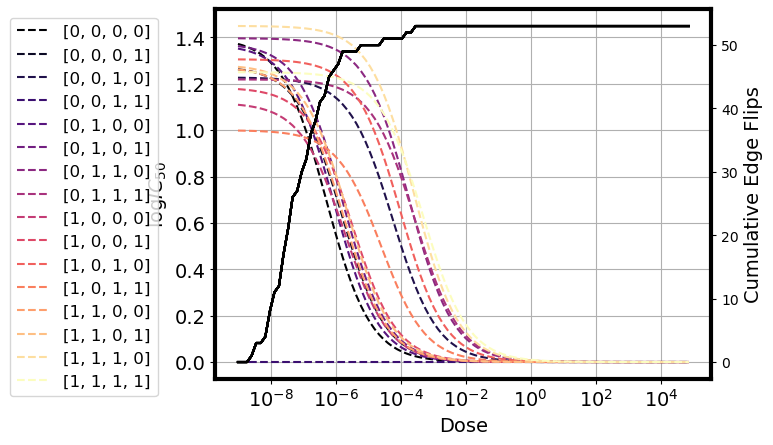

In [46]:
fig,ax=plt.subplots() 
ax2= ax.twinx()
for genotype in range(len(logic50s)):
    ax.semilogx(xs[::1000], ys[genotype][::1000],color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--")

    
ax.grid()

ax.legend(fontsize=12,bbox_to_anchor=(-.1,1))


ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='k')
for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Cumulative Edge Flips',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'

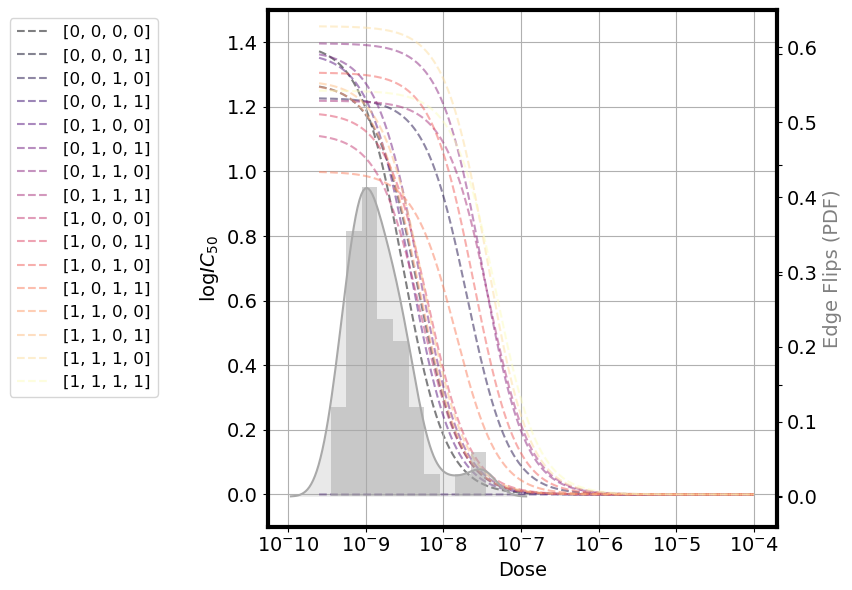

In [347]:
fig,ax=plt.subplots(figsize=(9,6)) 

#hist, bins, _ =plt.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten().astype(int)],
#                        bins=10,color='w',alpha=0);
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#ax2.hist(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()], bins=logbins,color='darkgrey',zorder=-1)
for genotype in range(len(logic50s)):
    ax.plot(np.log10(xs), ys[genotype],color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--",zorder=genotype,alpha=.5)
    #ax.legend(fontsize=12,bbox_to_anchor=(-.1,1))
    
    
    
#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='grey',label='Cum.')
ax3= ax.twinx()
ax3.hist(np.log10(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()]), bins=10,color='darkgrey',zorder=-1,alpha=.5)
ax2= ax.twinx()
sns.kdeplot(np.log10(np.array(xs)[np.argwhere(np.sum(arr,axis=0)).flatten()]), shade=True, ax=ax2,color='darkgrey')


ax.grid()
ax3.set_ylim([-1.4,22])
ax2.set_ylim([-.04,.65])
ax.set_ylim([-.1,1.5])
ax3.set_yticklabels([])
#ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))
ax.legend(fontsize=12,bbox_to_anchor=(-.2,1))
for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Edge Flips (PDF)',fontsize=14,color='grey')
ax.set(xticklabels=["$10^" + i.get_text() + "$" for i in labels])
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

In [228]:
pos = {(0,0,0,0,): [.4,1],
       (1,0,0,0): [.15,.75],(0,1,0,0): [.35,.75],(0,0,1,0): [.55,.75],(0,0,0,1): [.75,.75],
      (1,1,0,0):[.05,.5],(1,0,1,0):[.2,.5],(1,0,0,1):[.35,.5],(0,1,1,0):[.5,.5],(0,1,0,1):[.65,.5],(0,0,1,1):[.8,.5],
      (1,1,1,0):[.15,.25],(1,1,0,1):[.35,.25],(1,0,1,1):[.55,.25],(0,1,1,1):[.75,.25],
      (1,1,1,1):[.4,0]}

#positiong nodes manually - have tfound no automatic way to tihis well -all of the networkx energy minization tools fail to :"square" up the node the viewrs plane

(0.012499999999999997, 0.8375, -0.05, 1.05)

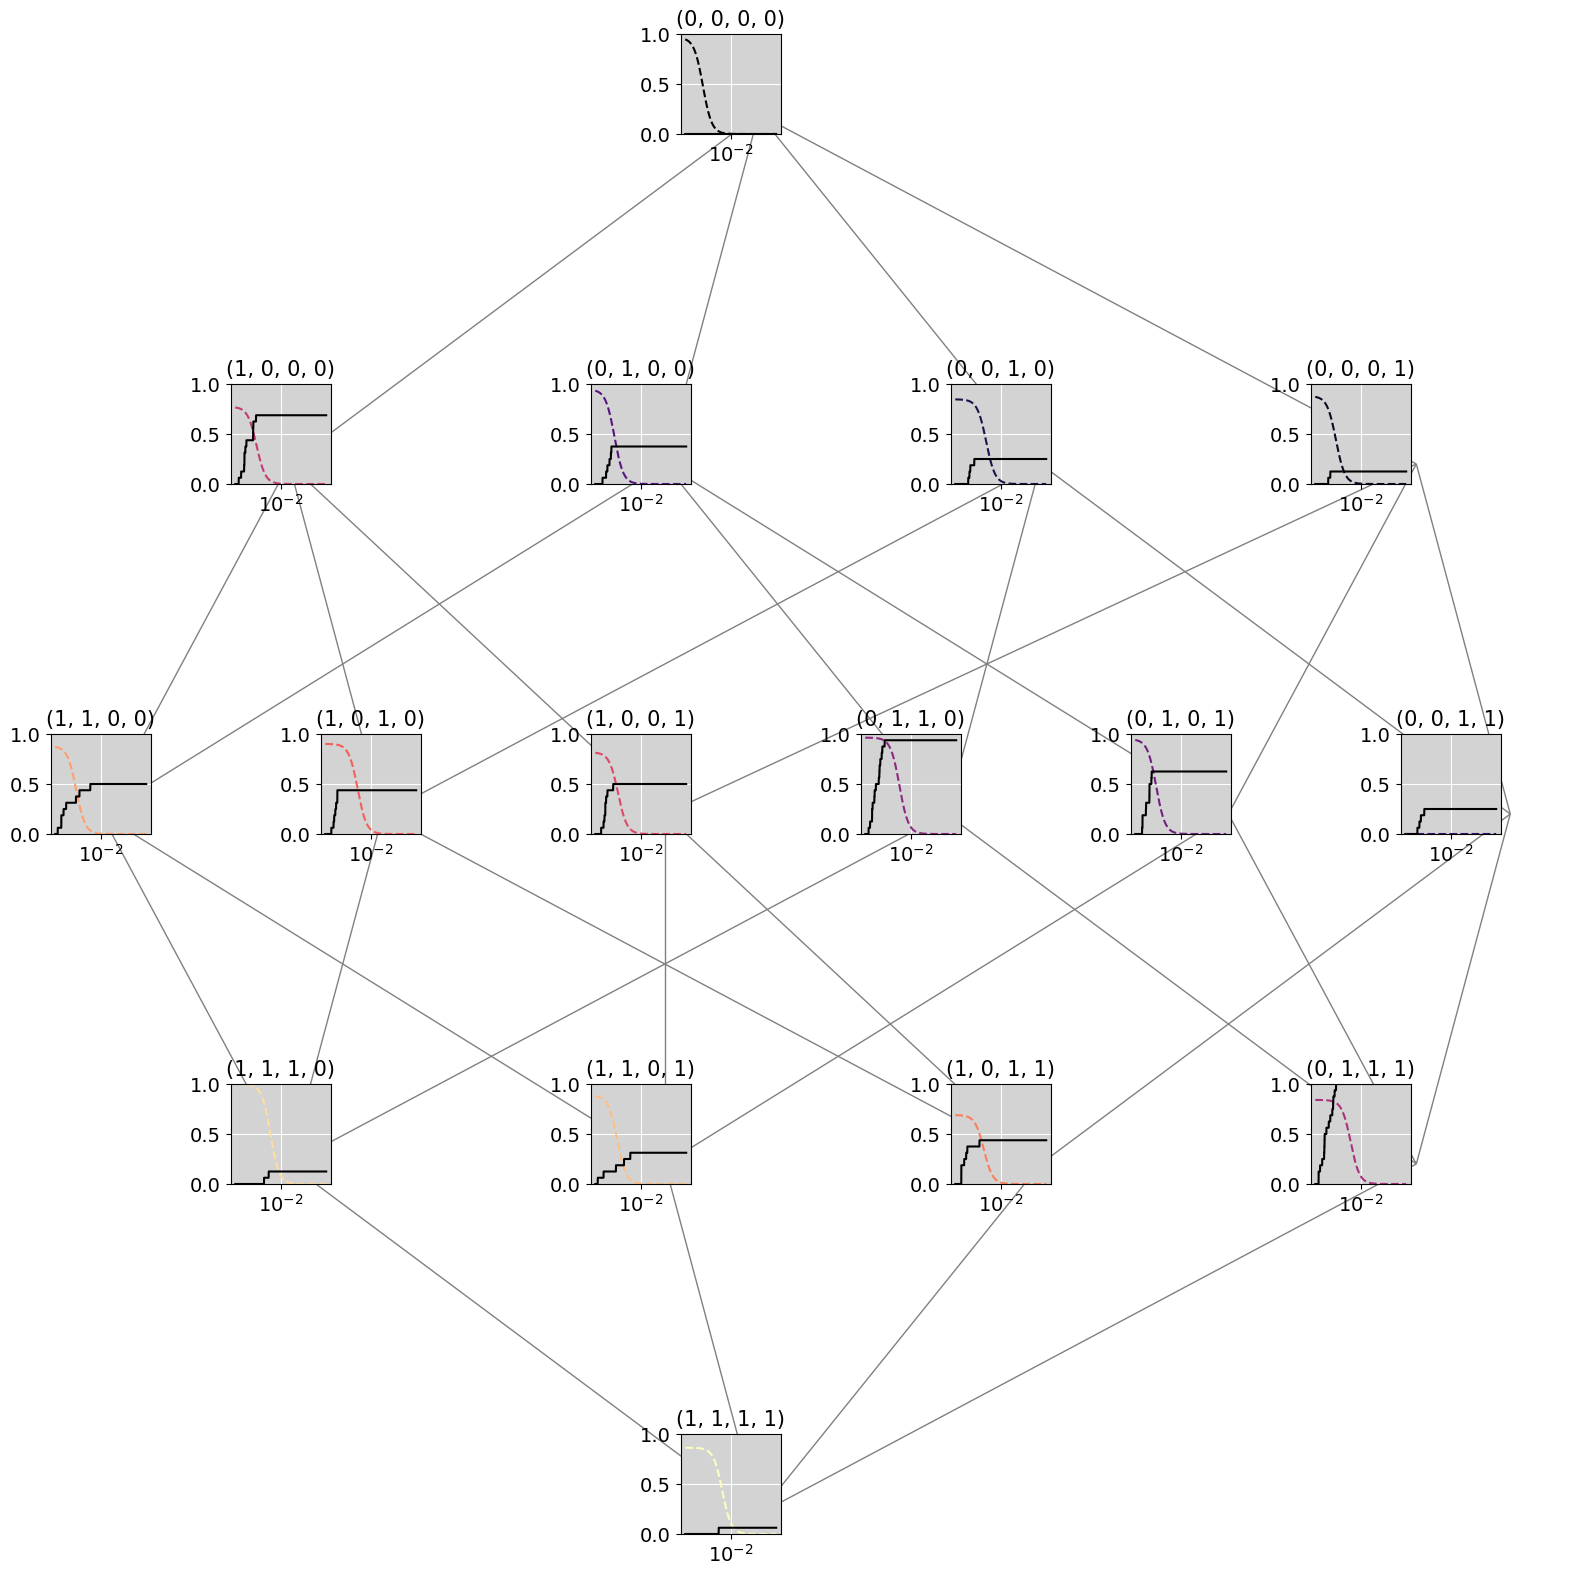

In [235]:
fig,ax=plt.subplots(figsize=(20,20))
G = nx.hypercube_graph(4) #establishing 5 cube
for node in G:
    genotype = convertGenotypeToInt(node)
    plt.axes([pos[node][0]+(.9-pos[node][0])*.1,pos[node][1] +(.45-pos[node][1])*.3 , .05, .05], 
             facecolor='lightgray')
    plt.semilogx(xs, ys[genotype]/np.max(ys),color=colors[genotype],label=convertIntToGenotype(genotype,4),linestyle="--")
    plt.semilogx(xs[1:],np.cumsum(arr[genotype])/16,color='k')
    #graph logMIC vs termature at each node
    plt.ylim([0,1])
    plt.title(str(node),fontsize=15)
    plt.grid(color='w')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #label representative node axes
   # if node == (0,0,0,0,0):
        #plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
       # plt.ylabel('$\log_2 MIC$',fontsize=15)

    #label representative node axes
   # ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='gray')#ghis will draw the edge betweeen nodes,
#looks okay without too, but will need to adjust axis spines if this case


ax.axis('off')

In [489]:
genotypes

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [488]:
a4 = np.array([[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])
a1 = np.array([[0,8],[1,9],[2,10],[3,11],[4,12],[5,13],[6,14],[7,15]])
a2= np.array([[0,4],[1,5],[2,6],[3,7],[4,8],[5,9],[6,10],[7,8]])
a3 = np.array([[0,2],[1,3],[2,4],[3,5],[4,6],[5,7],[6,8],[7,9]])


inds = np.argsort(np.argwhere(arr==1),axis=0)[:,1]

ordp = np.argwhere(arr==1)[inds,0]
ordp = ordp.reshape(int(len(ordp)/2),2)


alleles = np.zeros((4,len(xs)))
for i,pair in enumerate(ordp):
    all_ind = 0
    for a in a1:
        if np.all(pair==a):
            all_ind =0
            
    for a in a2:
        if np.all(pair==a):
            all_ind =1
            
    for a in a3:
        if np.all(pair==a):
            all_ind =2
            
    for a in a4:
        if np.all(pair==a):
            all_ind =3
            
    alleles[all_ind,np.argwhere(arr==1)[inds,1].reshape(53,2)[i,0]] =1
            
    
            
    

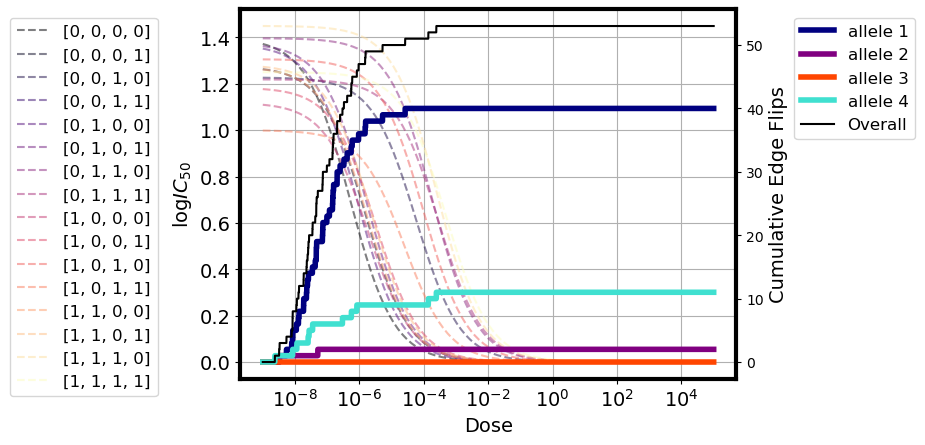

In [487]:
fig,ax=plt.subplots() 
ax2= ax.twinx()
for genotype in range(len(logic50s)):
    ax.semilogx(xs[::1000], ys[genotype][::1000],color=colors[genotype],
                label=convertIntToGenotype(genotype,4),linestyle="--",alpha=.5)

colors_allele = ['navy','purple','orangered','turquoise']
for i in range(4):
    ax2.semilogx(xs,np.cumsum(alleles[i,:]),label = 'allele ' +str(i+1),lw=4,color=colors_allele[i])
    
    
ax2.semilogx(xs,np.cumsum(np.sum(alleles,axis=0),axis=0),color='k',label = 'Overall')
ax.grid()

ax.legend(fontsize=12,bbox_to_anchor=(-.15,1))
ax2.legend(fontsize=12,bbox_to_anchor=(1.1,1))


#ax2.semilogx(xs[1:][::1000],np.cumsum(np.sum(arr,axis=0))[::1000]/2,color='k')

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
ax.set_ylabel('$\log IC_{50}$',fontsize=14)
ax.set_xlabel('Dose',fontsize=14)
ax2.set_ylabel('Cumulative Edge Flips',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['figure.facecolor'] = 'white'